In [47]:
import pandas as pd 
import numpy as np 
from scipy import stats
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## Problem 1

### I have done some of the assignment i python as this is the language I know, but also have tried to learn some R and have used R for some of the problems.

## (a) Make the data available through the commands


In [48]:
df = pd.read_table("https://www.uio.no/studier/emner/matnat/math/STK2100/data/nuclear.dat")

In [49]:
df.head()

,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
0,460.05,68.58,14,46,687,0,1,0,0,14,0
1,452.99,67.33,10,73,1065,0,0,1,0,1,0
2,443.22,67.33,10,85,1065,1,0,1,0,1,0
3,652.32,68.00,11,67,1065,0,1,1,0,12,0
4,642.23,68.00,11,78,1065,1,1,1,0,12,0


In [4]:
url = "https://www.uio.no/studier/emner/matnat/math/STK2100/data/nuclear.txt"
r = requests.get(url)
for line in r.text.split("\n"):
    print(line)

Nuclear Power Station Construction Data

SUMMARY:
       The nuclear data frame has 32 rows and 11 columns.

       The data relate to the  construction  of  32  light  water
       reactor  (LWR) plants constructed in the U.S.A in the late
       1960's and early 1970's.  The data was collected with  the
       aim  of predicting the cost of construction of further LWR
       plants.   6  of  the  power  plants  had  partial  turnkey
       guarantees and it is possible that, for these plants, some
       manufacturers' subsidies  may  be  hidden  in  the  quoted
       capital costs.

DATA DESCRIPTION:
       This data frame contains the following columns:

cost:     The capital cost of construction in millions of dollars
       adjusted to 1976 base.
date:     The date on which the construction permit  was  issued.
       The data are measured in years since January 1 1990 to the
       nearest month.
t1:     The  time  between  application  for  and  issue  of  the
       construct

In [5]:
df.describe().round(2)

,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,461.56,68.58,13.75,62.38,825.38,0.31,0.25,0.41,0.19,8.53,0.19
std,170.12,1.02,3.37,10.39,189.36,0.47,0.44,0.50,0.40,6.33,0.40
min,207.51,67.17,7.00,44.00,457.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,310.32,67.90,11.75,56.50,745.00,0.00,0.00,0.00,0.00,3.00,0.00
50%,448.10,68.42,13.00,62.50,822.00,0.00,0.00,0.00,0.00,7.50,0.00
75%,611.96,68.92,15.25,70.25,947.25,1.00,0.25,1.00,0.00,12.50,0.00
max,881.24,71.08,22.00,85.00,1130.00,1.00,1.00,1.00,1.00,21.00,1.00


### Looking at the scatter plot there seems to be some visual signs of correlation between the cost response variable and date and t1 features. 
### From the plots we can also see that there are some binary variables. 

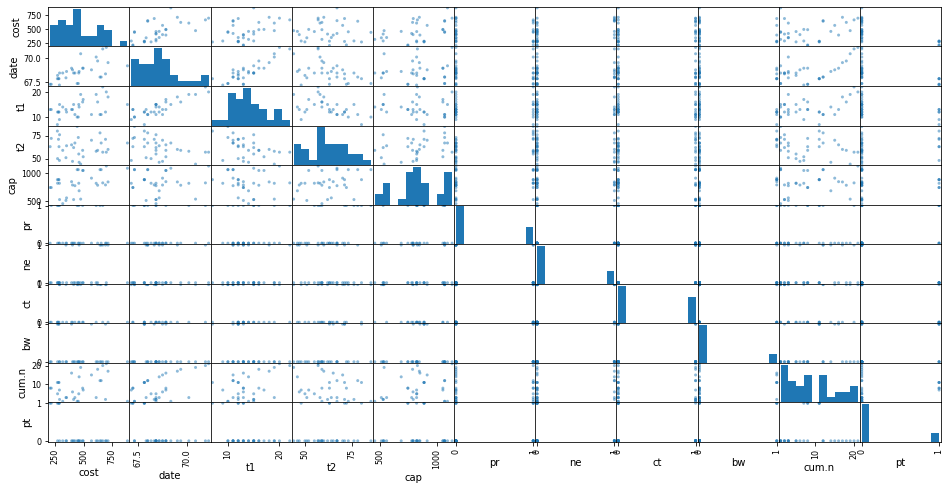

In [6]:
pd.plotting.scatter_matrix(df,figsize=(16,8))
plt.show()

### Creating the y response variable and the design matrix X and adding an intersept with the statsmodels (sm) library.

In [7]:
X = df.drop("cost",axis=1)
y = df.cost.apply(np.log)

n = X.shape[0]
p = X.shape[1]

X = sm.add_constant(X)

In [8]:
p

10

## (b) We will first look at a model  $$ Y_i = \beta_0 + \beta_1 x_1 + ... + \beta_p x_{i,p} + \epsilon_i $$

### We assume the noise terms $\epsilon_i$ is normaly distributed and independent of each other. 
### There is also an assuption of a zero mean for the noise and have a constant variance. 

### The most important assumption is that the noise is normaly distributed. 


## =================================

### Fitting first the model using matrix operations.
### Displaying the estimates of beta, std. error, t-value and p-value for each feature in a table. 

In [9]:
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_hat = X @ beta

D = np.linalg.norm(y-y_hat)**2

s2 = D / (n-p)

varBeta = s2*np.linalg.inv(X.T @ X)

SE = np.sqrt(np.diagonal(varBeta))

t_value = beta / SE

p_value = stats.t.sf(np.abs(t_value), n-1)*2

result = pd.DataFrame((beta.round(3),SE.round(2),t_value.round(2),p_value.round(3)),
             index=["Beta","Standar error","t-value","p-value"],
            columns=X.columns.to_list()).T

result

,Beta,Standar error,t-value,p-value
const,-10.634,5.58,-1.91,0.066
date,0.228,0.08,2.69,0.011
t1,0.005,0.02,0.24,0.811
t2,0.006,0.00,1.25,0.221
cap,0.001,0.00,4.99,0.000
pr,-0.108,0.08,-1.33,0.195
ne,0.259,0.08,3.35,0.002
ct,0.116,0.07,1.68,0.102
bw,0.037,0.10,0.35,0.725
cum.n,-0.012,0.01,-1.57,0.126


### Fitting the same model using the statsmodels library. 

In [10]:
linear_model = sm.OLS(y,X).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     13.28
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.72e-07
Time:                        22:17:12   Log-Likelihood:                 18.101
No. Observations:                  32   AIC:                            -14.20
Df Residuals:                      21   BIC:                             1.921
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6340      5.710     -1.862      0.077     -22.509       1.241
date           0.2276      0.087      2.629      0.016       0.048       0.408
t1             0.0053      0.022      0.236      0.816      -0.041       0.052
t2             0.0056      0.005      1.220      0.236      -0.004       0.015
cap            0.0009      0.000      4.878      0.000       0.001       0.001
pr            -0.1081      0.084     -1.295      0.209      -0.282       0.066
ne             0.2595      0.079      3.274      0.004       0.095       0.424
ct             0.1155      0.070      1.644      0.115      -0.031       0.262
bw             0.0368      0.106      0.346      0.733      -0.184       0.258
cum.n         -0.0120      0.008     -1.536      0.139      -0.028       0.004
pt            -0.2220      0.130     -1.702      0.104      -0.493       0.049
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.482
Skew:                          -0.262   Prob(JB):                        0.786
Kurtosis:                       2.706   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## (c) Now remove the variable with the highest corresponding P-value and fit the new model.

### Removing variables that has a high P-value leaves features that are more likely to be impactful when predicting the response variable.

In [11]:
p_values = linear_model.pvalues.sort_values(ascending=False)
p_values

t1       0.816098
bw       0.732608
t2       0.235986
pr       0.209429
cum.n    0.139440
ct       0.115033
pt       0.103520
const    0.076619
date     0.015672
ne       0.003620
cap      0.000080
dtype: float64

Removing the feature with the highest P-value : t1

In [12]:
X2 = X.drop(p_values.drop("const").index[0], axis=1)

The remaining features:

In [13]:
X2.head(3)

,const,date,t2,cap,pr,ne,ct,bw,cum.n,pt
0,1.0,68.58,46,687,0,1,0,0,14,0
1,1.0,67.33,73,1065,0,0,1,0,1,0
2,1.0,67.33,85,1065,1,0,1,0,1,0


Fitting a new model:

In [14]:
linear_model2 = sm.OLS(y,X2).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     15.42
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.42e-07
Time:                        22:17:12   Log-Likelihood:                 18.059
No. Observations:                  32   AIC:                            -16.12
Df Residuals:                      22   BIC:                            -1.461
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6117      3.835     -3.027      0.006     -19.566      -3.657
date           0.2431      0.055      4.435      0.000       0.129       0.357
t2             0.0055      0.004      1.225      0.233      -0.004       0.015
cap            0.0009      0.000      5.002      0.000       0.001       0.001
pr            -0.1035      0.079     -1.303      0.206      -0.268       0.061
ne             0.2607      0.077      3.368      0.003       0.100       0.421
ct             0.1142      0.069      1.667      0.110      -0.028       0.256
bw             0.0262      0.094      0.278      0.783      -0.169       0.222
cum.n         -0.0122      0.008     -1.599      0.124      -0.028       0.004
pt            -0.2157      0.125     -1.727      0.098      -0.475       0.043
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.506
Skew:                          -0.284   Prob(JB):                        0.777
Kurtosis:                       2.762   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Almost all the variables reduced their P-value when removing t1. 
### This could mean that the model as a whole got better. 
### The biggest reduction in P-values was seen in cum.n and date variables as seen in the table and first plot below.

### The variables cum.n and date which had the greatest drop in P-values also has relatively high correlations with the removed variable t1. 

In [15]:
p_values_models = pd.concat([p_values,linear_model2.pvalues],axis=1)
p_values_models["Diff"] = p_values_models[1] - p_values_models[0]
p_values_models.sort_values("Diff")

,0,1,Diff
const,0.076619,0.006187,-0.070431
date,0.015672,0.000208,-0.015464
cum.n,0.139440,0.124034,-0.015406
pt,0.103520,0.098181,-0.005339
ct,0.115033,0.109715,-0.005317
pr,0.209429,0.205922,-0.003507
t2,0.235986,0.233451,-0.002536
ne,0.003620,0.002772,-0.000848
cap,0.000080,0.000052,-0.000027
bw,0.732608,0.783401,0.050794


Table: P-values for the first model with t1 and then without and difference in P-value between the two models.

<AxesSubplot:>

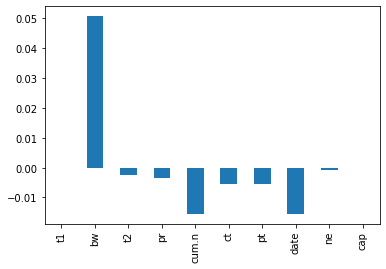

In [16]:
p_values_models.drop("const").Diff.plot(kind="bar")

Plot: Change in P-values 

<AxesSubplot:>

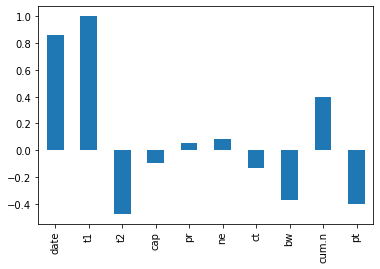

In [17]:
X.drop("const",axis=1).corr()["t1"].plot(kind="bar")

Plot: Correlation between the variables and the removed variables t1. 

## (d) Continue to remove explanatory variables until all P-values are less than 0.05.

### Implementing an algorithm removing the highest P-value variable and then fitting a new model, continuing to remove variables until all has P-value lower than 0.05.

In [18]:
linear_model = sm.OLS(y,X).fit()
p_values = linear_model.pvalues

max_p = (p_values.idxmax(),p_values.loc[p_values.idxmax()])

features = X.columns
features_list = []

while max_p[1] > 0.05:
    linear_model = sm.OLS(y,X[features]).fit()
    p_values = linear_model.pvalues
    max_p = (p_values.drop("const").idxmax(), p_values.drop("const").loc[p_values.drop("const").idxmax()])
   
    features_list.append(features)    
    features = features.drop(max_p[0])
    

p_value_model = linear_model

features_list

[Index(['const', 'date', 't1', 't2', 'cap', 'pr', 'ne', 'ct', 'bw', 'cum.n',
        'pt'],
       dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'pr', 'ne', 'ct', 'bw', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'pr', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'ct', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'pt'], dtype='object')]

List: List of features in models trained after removing highest P-value variable. 
Last one being the final model. \
Below a summary of the final model.

In [19]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     28.70
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.25e-09
Time:                        22:17:12   Log-Likelihood:                 12.774
No. Observations:                  32   AIC:                            -15.55
Df Residuals:                      27   BIC:                            -8.219
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5036      2.502     -1.800      0.083      -9.638       0.631
date           0.1439      0.036      3.961      0.000       0.069       0.218
cap            0.0009      0.000      5.238      0.000       0.001       0.001
ne             0.2024      0.075      2.692      0.012       0.048       0.357
pt            -0.3965      0.096     -4.116      0.000      -0.594      -0.199
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                0.296
Skew:                          -0.053   Prob(JB):                        0.862
Kurtosis:                       3.459   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting the residuals agains the predicted values with the y-axis scaled to the values of y shows predictions that seems to have quite small errors. 

(-6.781330006544365, 6.781330006544365)

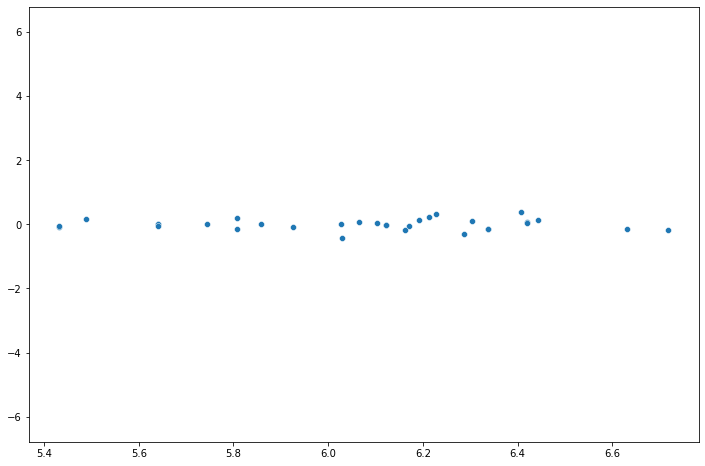

In [20]:
residuals = linear_model.resid
predictions = linear_model.fittedvalues

plt.figure(figsize=(12,8))
sns.scatterplot(x=predictions,y=residuals)
plt.ylim(-y.max(),y.max())

Plot: Plot of residuals against predicted values

### Looking at the scatter matrix it seems that there are some correlation between response variable and the variables date and cap. 
### The binary variables seems to be skewed to one side. 

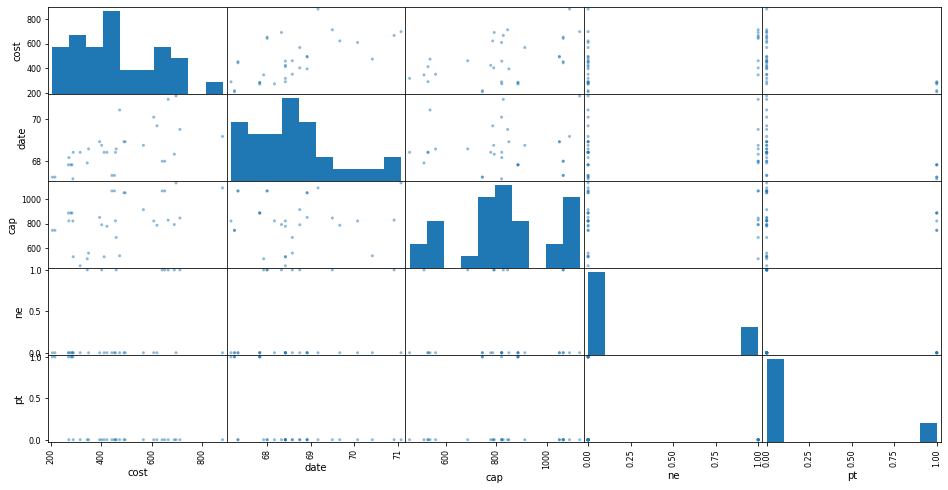

In [21]:
features =features_list[-1]
["cost"]+features.drop("const").to_list()

pd.plotting.scatter_matrix(df[["cost"]+features.drop("const").to_list()],
                           figsize=(16,8))
plt.show()

## (e) Use the final model to predict response and make a model based on the average quadratic error

### The MSE score seemd to be quite low. 
### Uncertain what procedure to discuss here.

In [22]:
predictions = linear_model.predict(X[linear_model.params.index])
MSE = (sum(( y - predictions)**2)) / n
print(f"Mean squared error is: {MSE}")

Mean squared error is: 0.02635123691729991


## (f) Show that AIC and BIC are equal to (LM.BIC) and (LM.BIC) for the linear regression model with Gaussian noise.

## (g) Try out the automatic model selection command on the nuclear dataset both using AIC and BIC. Which models do you end up with then?


In [23]:
X.shape

(32, 11)

In [24]:
def stepwise_selection(param):

    linear_model = sm.OLS(y,X).fit()
    if param == "AIC":
        last_AIC = linear_model.aic 
    elif param == "BIC":
        last_AIC = linear_model.bic
    features = X.columns.drop("const")
    AIC_list = []
    while 1 > 0:
        AIC_list = []
        for f in features:
            lm = sm.OLS(y,X.drop(f, axis = 1)).fit()
            
            if param == "AIC":
                
                AIC = lm.aic
            elif param == "BIC":
                AIC = lm.bic
            AIC_list.append((f,AIC))

        AIC_ = pd.DataFrame(AIC_list,columns=["Feature",f"{param}"]).sort_values(f"{param}")
        print(AIC_.T.sort_index(axis=1))

        if AIC_.iloc[0][f"{param}"] < last_AIC:
            features = features.drop(AIC_.iloc[0].Feature)
        else:
            lm = sm.OLS(y,X[features.insert(0,"const")]).fit()
            return lm
            break
           

In [25]:
AIC_model = stepwise_selection("AIC")

               0        1       2        3        4        5        6  \
Feature     date       t1      t2      cap       pr       ne       ct   
AIC     -7.09533 -16.1179 -14.011  8.04219 -13.7443 -3.00329 -12.3275   

               7        8        9  
Feature       bw    cum.n       pt  
AIC     -16.0202 -12.7947 -12.0673  
               0       1        2        3        4        5        6  \
Feature     date      t2      cap       pr       ne       ct       bw   
AIC     -7.09533 -14.011  8.04219 -13.7443 -3.00329 -12.3275 -16.0202   

               7        8  
Feature    cum.n       pt  
AIC     -12.7947 -12.0673  
               0       1        2        3        4        5        6        7
Feature     date      t2      cap       pr       ne       ct    cum.n       pt
AIC     -7.09533 -14.011  8.04219 -13.7443 -3.00329 -12.3275 -12.7947 -12.0673


In [26]:
BIC_model = stepwise_selection("BIC")

               0        1         2        3         4        5        6  \
Feature     date       t1        t2      cap        pr       ne       ct   
BIC      7.56203 -1.46057  0.646329  22.6996  0.913029  11.6541  2.32989   

               7        8        9  
Feature       bw    cum.n       pt  
BIC     -1.36281  1.86266  2.59003  
               0         1        2         3        4        5        6  \
Feature     date        t2      cap        pr       ne       ct       bw   
BIC      7.56203  0.646329  22.6996  0.913029  11.6541  2.32989 -1.36281   

               7        8  
Feature    cum.n       pt  
BIC      1.86266  2.59003  
               0         1        2         3        4        5        6  \
Feature     date        t2      cap        pr       ne       ct    cum.n   
BIC      7.56203  0.646329  22.6996  0.913029  11.6541  2.32989  1.86266   

               7  
Feature       pt  
BIC      2.59003  
               0        1         2        3        4        

## (h) Have a look on the order of which the two different methods select models. Explain why the order should be the same for AIC and BIC.

### It is the same models selected by both AIC and BIC methods. But the BIC selects two more models after AIC and produces a smaller model, a model with fewer features. 
### The model has quite few samples, 32 in total and 10 features. This makes for n not very big compared to p and the penalty in the BIC model is not significant compared to the one for AIC. 

### ----------------------------------------------------

## (i) Discuss potential differences compared with the manual selection based on the P-values (both with respect to the order they are selected and the number of variables that are included in the end).

### All three methods seems to select features in the same order. The AIC ends its search with 8 features compared to the BIC method with 5 features. The model selection based on P-values picked the same models as AIC and BIC methods but narrowed it even further to 4 features. Based on $R^2$ score the best model seems to be the one selected by AIC method, then BIC and last P-value based selection.

In [30]:
p_value_model.rsquared

0.8095692530236496

$R^2$ for model selected on P-values

In [31]:
AIC_model.rsquared

0.8626571839006298

$R^2$ for model selected on AIC

In [32]:
BIC_model.rsquared

0.830610293207663

$R^2$ for model selected on BIC

In [28]:
features_list

[Index(['const', 'date', 't1', 't2', 'cap', 'pr', 'ne', 'ct', 'bw', 'cum.n',
        'pt'],
       dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'pr', 'ne', 'ct', 'bw', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'pr', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 't2', 'cap', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'ct', 'cum.n', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'ct', 'pt'], dtype='object'),
 Index(['const', 'date', 'cap', 'ne', 'pt'], dtype='object')]

List of models based on P-values

### ---------------------------------------------------------------

## (j) Show that if Z ∼ N(µ, σ2) , then E[exp(Z)] = exp(µ + 0.5σ2). Use this to argue that we have two possible estimates of η:

### Problem (j) I am not able to solve. 

## (k) Perform predictions based on the three choosen modes you obtained earlier

#### The predictions from the three different models are different. And the values are in increasing order lowest from P-value model, then BIC and then AIC. This is the same as the $R^2$ scoring suggested. The values predicted seems quite reasonable comparing it to the original dataset. 

In [85]:
new_datapoint = pd.DataFrame(
                   {"const":1,
                    "date":70.0,
                    "t1":13,
                    "t2":50,
                    "cap":800,
                    "pr":1,
                    "ne":0,
                    "ct":0,
                    "bw":1,
                    "cum.n":8,
                    "pt":1},index=[0])

In [86]:
new_datapoint

,const,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
0,1,70.0,13,50,800,1,0,0,1,8,1


Table: New datapoint

In [87]:
p_value_model_features = p_value_model.params.index
AIC_model_features = AIC_model.params.index
BIC_model_features = BIC_model.params.index
pd.DataFrame([AIC_model_features,BIC_model_features,p_value_model_features],index=["AIC Model","BIC Model","P-value Model"])

,0,1,2,3,4,5,6,7,8
AIC Model,const,date,t2,cap,pr,ne,ct,cum.n,pt
BIC Model,const,date,cap,ne,ct,pt,None,None,None
P-value Model,const,date,cap,ne,pt,None,None,None,None


Table: Features included in the three models used to predict the new datapoint

In [88]:
AIC_model.predict(new_datapoint[AIC_model_features])

0    5.968446
dtype: float64

In [89]:
predictions_ = {"AIC Model": AIC_model.predict(new_datapoint[AIC_model_features]),
               "BIC Model":BIC_model.predict(new_datapoint[BIC_model_features]),
               "P-value Model": p_value_model.predict(new_datapoint[p_value_model_features])}

pred_df =pd.DataFrame(predictions_)#.append(pd.DataFrame(predictions_,index=[C]).apply(np.exp))
pred_df = pred_df.append(pd.DataFrame(predictions_).apply(np.exp))
pred_df.set_axis(["log(cost)","cost"],inplace=True)
pred_df

,AIC Model,BIC Model,P-value Model
log(cost),5.968446,5.888265,5.876308
cost,390.897773,360.778910,356.490489


Table: Predictions for cost variable for the new datapoint.